# Predict the Success of an Advertisement Campaign

> V.A. Suchar
> 11/12/15

#### 1. Description of the data and project

> Using the following dataset, I want to determine if an e-mail campaign was successful. Meaning if it increased the visibility and the sales of an online retailer.
>  For this, I will use a dataset of 64,000 customers that purchased items within twelve months.
> The data source is:: http://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html

> The customers were involved in an e-mail test:
>      -    1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise.
>      -    1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise.
>      -    1/3 were randomly chosen to not receive an e-mail campaign.

> During a period of two weeks following the e-mail campaign, results were tracked. 
> Historical customer attributes:
>      -    Recency: Months since last purchase.
>      -    History_Segment: Categorization of dollars spent in the past year.
>      -    History: Actual dollar value spent in the past year.
>      -    Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
>      -    Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
>      -    Zip_Code: Classifies zip code as Urban, Suburban, or Rural.
>      -    Newbie: 1/0 indicator, 1 = New customer in the past twelve months.
>      -    Channel: Describes the channels the customer purchased from in the past year.

> Another variable describes the e-mail campaign the customer received:
>     -    Mens E-Mail
>      -   Womens E-Mail
>      -   No E-Mail

> Variables describing activity in the two weeks following delivery of the e-mail campaign:
>      -    Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks.
>      -    Conversion: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.
>      -    Spend: Actual dollars spent in the following two weeks.

#### 2. Data and summary statistics

In [36]:
#Preliminaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# The dataset:
data=pd.read_csv('C:/Users/vasiles/Dropbox/STAT 504 Python/project/dataset2.csv')
data.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2,142.44,1,0,Surburban,0,Phone,WomensEMail,0,0,0
1,6,3,329.08,1,1,Rural,1,Web,NoEMail,0,0,0
2,7,2,180.65,0,1,Surburban,1,Web,WomensEMail,0,0,0
3,9,5,675.83,1,0,Rural,1,Web,MensEMail,0,0,0
4,2,1,45.34,1,0,Urban,0,Web,WomensEMail,0,0,0


In [38]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
recency,64000,5.763734,3.507592,1.00,2.00,6.00,9.0000,12.00
history_segment,64000,2.481969,1.544514,1.00,1.00,2.00,3.0000,7.00
history,64000,242.085656,256.158608,29.99,64.66,158.11,325.6575,3345.93
mens,64000,0.551031,0.497393,0.00,0.00,1.00,1.0000,1.00
womens,64000,0.549719,0.497526,0.00,0.00,1.00,1.0000,1.00
newbie,64000,0.502250,0.499999,0.00,0.00,1.00,1.0000,1.00
visit,64000,0.146781,0.353890,0.00,0.00,0.00,0.0000,1.00
conversion,64000,0.009031,0.094604,0.00,0.00,0.00,0.0000,1.00
spend,64000,1.050908,15.036448,0.00,0.00,0.00,0.0000,499.00


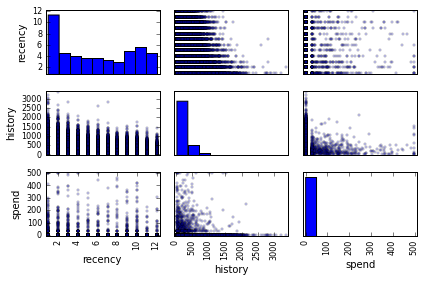

In [39]:
data2=data[['recency', 'history', 'spend']]
%matplotlib inline
axes = pd.tools.plotting.scatter_matrix(data2, alpha=0.2)
plt.tight_layout()
plt.savefig('scatter_matrix.png')

#### 3. Statistical analysis methods

> A data analysis for the dataset will be conducted to predict if the customers visited the webpage and if they made a purchase in the last two weeks. Various models (as introduced in the class) will be compared and contrasted for performance. 
> A regression analysis of the amount spent on the last to weeks will be also conducted.
> The focus of the anlysis will be to identify if the campaign was succesful & which features can be used in predicting purchasing behaviour of customers. 